# Udacity - Communicate Data Findings (Dataset: Loan Data from Prosper
## by Mustafa Ahmed Hemdan

## Overview and Notes 

This dataset contains data from over 100,000 prosper loans. 
Each row contains information about a specific loan that was funded through the Prosper marketplace. 

#### What is prosper? 
Prosper is a San Francisco based company in the peer-to-peer lending marketplace in the United States. Since 2005, 
Prosper has facilitated more than $15 billion in loans to more than 930,000 people.

In [1]:
# import pakages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
# Load data csv 
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Factors affects the borrower’s APR or interest rate: 
-  it's important to look at APR to understand what might be considered normal. The APR plot seems to be normally distributed, with larg amount of annual percentage rate in 0.15-0.25, and also high in 0.35-0.375.


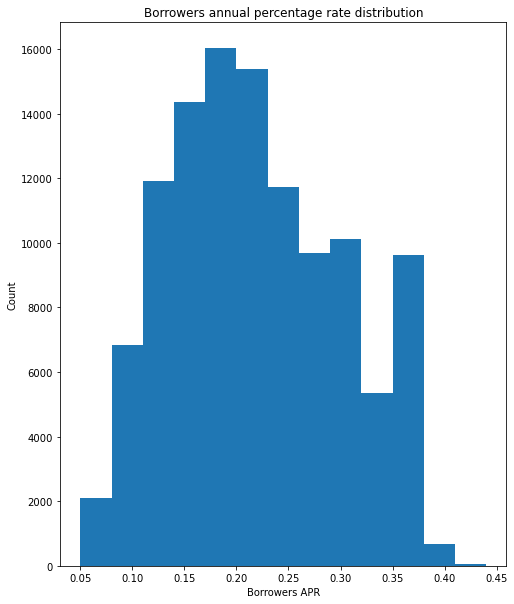

In [3]:
# Plot Histogram for the borrowerrs Annual percentage rate  
bins = np.arange(0.05, 0.45, 0.03)
plt.figure(figsize = (8,10))
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.title('Borrowers annual percentage rate distribution')
plt.xlabel('Borrowers APR')
plt.ylabel('Count');


### Borrower APR by States :
- ME has the lowest APR at about 0.15 while AL has the highest APR at about 0.25

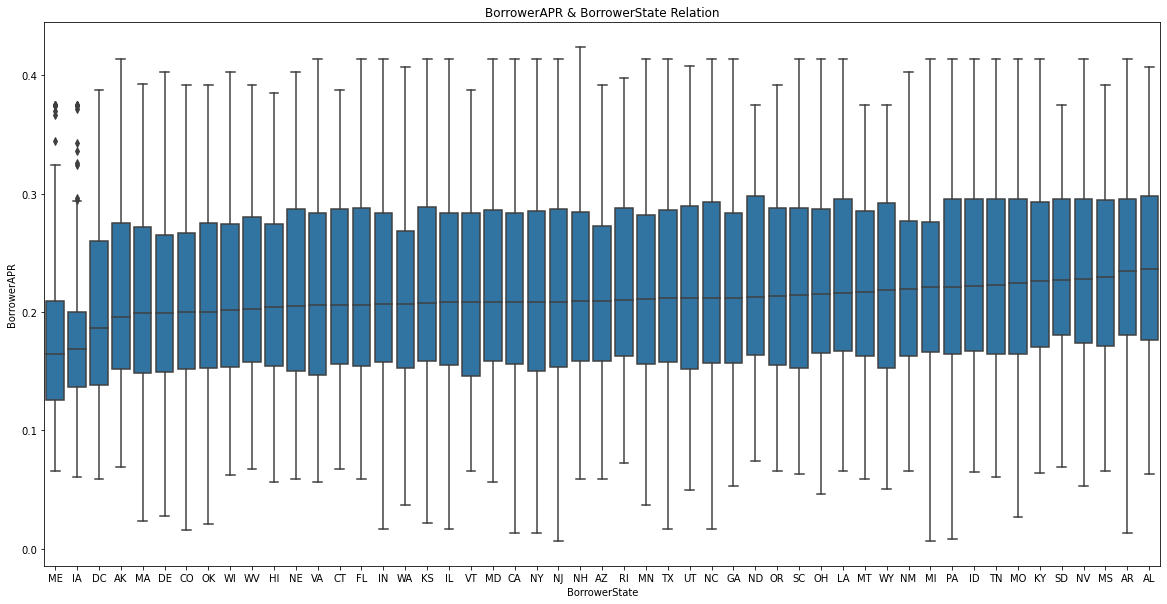

In [4]:
# Groupby BorrowersState to get the median 
state_apr_median = loan.groupby('BorrowerState', as_index = False)['BorrowerAPR'].median()

# Sort values by borrowersAPR
state_apr_values = state_apr_median.sort_values(by = 'BorrowerAPR')
state_apr_median = list(state_apr_values['BorrowerState'])

# Plot the box plot for the relation 
plt.figure(figsize = (20, 10))
base_color = sns.color_palette()[0]
sns.boxplot(data = loan, x = 'BorrowerState', y = 'BorrowerAPR', order = state_apr_median, color = base_color)
plt.title('BorrowerAPR & BorrowerState Relation');

## Borrower APR by Listing Category :
- Personal loan is the lowest at 0.176 median APR, and Cosmetic Procedure is the highest at 0.272 median APR nearly 10 percentage points higher

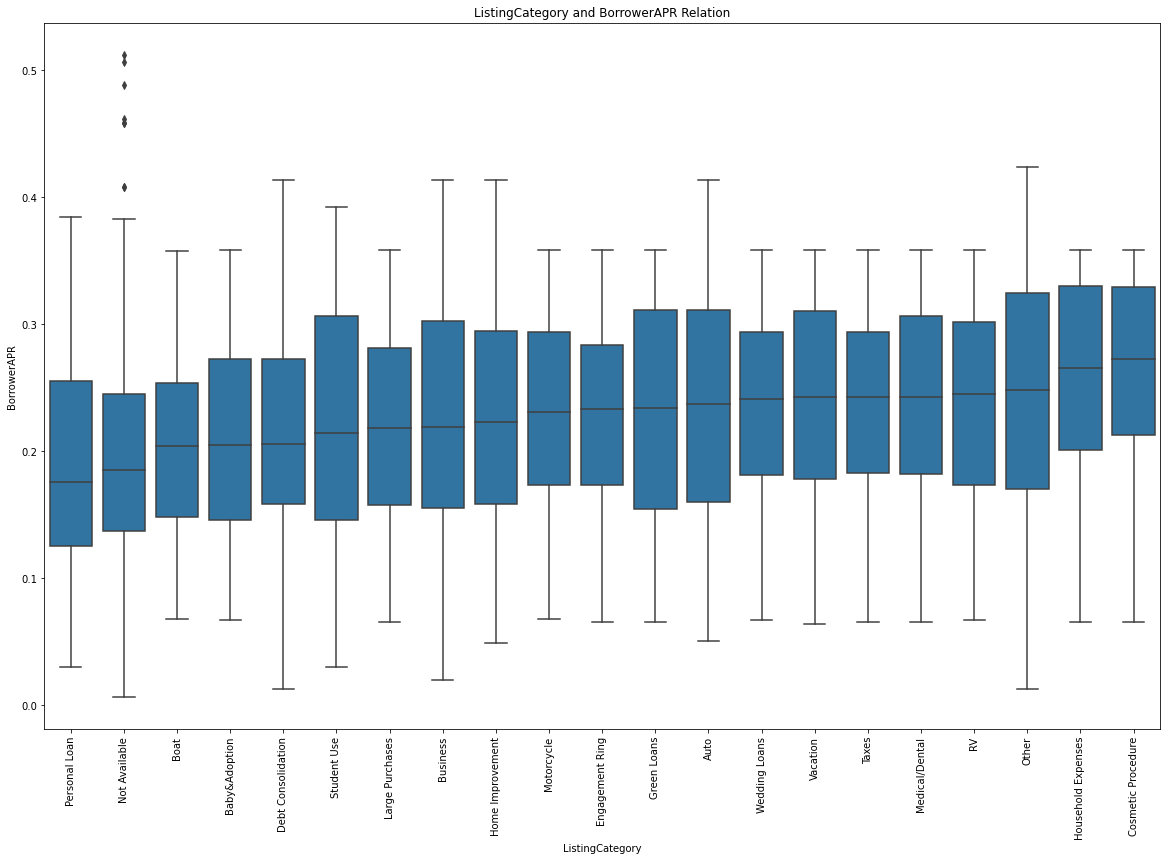

In [5]:
# First change the name of the column for use and change it's type to string
loan.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)
loan['ListingCategory'] = loan['ListingCategory'].astype('str')
# Change the numeric data in the column to it's definition and change it's type to category 
cat_def = {'0': 'Not Available', '1': 'Debt Consolidation', '2': 'Home Improvement', '3': 'Business', '4': 'Personal Loan', '5': 'Student Use', '6': 'Auto', '7': 'Other', '8': 'Baby&Adoption', '9': 'Boat', '10': 'Cosmetic Procedure', '11': 'Engagement Ring', '12': 'Green Loans', '13': 'Household Expenses', '14': 'Large Purchases', '15': 'Medical/Dental', '16': 'Motorcycle', '17': 'RV', '18': 'Taxes', '19': 'Vacation', '20': 'Wedding Loans'}
loan['ListingCategory'].replace(cat_def, inplace = True)
loan['ListingCategory'] = loan['ListingCategory'].astype('category')



# See the relation between Listing category and borrowerapr
# Groupby Listing Category and return the median
listing_cat_median = loan.groupby('ListingCategory', as_index = False)['BorrowerAPR'].median()
listing_cat_vars = listing_cat_median.sort_values(by = 'BorrowerAPR')
listing_cat_median = list(listing_cat_vars['ListingCategory'])

# Plot a box plot for the relation 
plt.figure(figsize=(20, 13))
base_color = sns.color_palette()[0]
ax = sns.boxplot(data = loan, x ='ListingCategory', y = 'BorrowerAPR', order = listing_cat_median, color = base_color);
plt.title('ListingCategory and BorrowerAPR Relation')
ax.set_xticklabels(listing_cat_median, rotation = 90);

## Borrower APR by Year:
- The median APR is in increase since 2009 until reaches maximum at 2011 and then it falls off to 2014, We can see that our all time high in interest rates came in 2010 as indicated by the whiskers however the median peak came a year later in 2012. Since then the median has continued to drop, another piece of information our box plot gives us is that in the past two years the body of our box plots has narrowed and since 2011 the overall range of interest rates has decreased as well this is good news for borrowers.

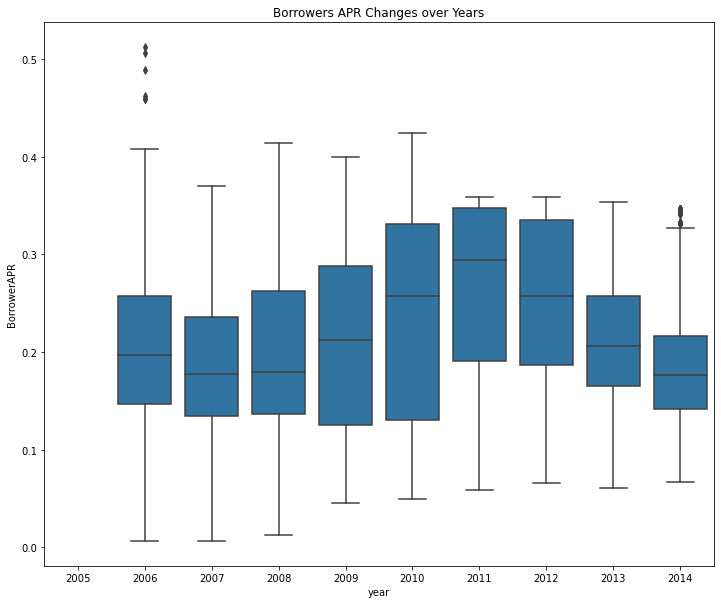

In [6]:
# make year column 
loan['year'] = pd.to_datetime(loan['ListingCreationDate']).dt.year

# plot box plot for APR changes over years
plt.figure(figsize = (12, 10))
base_color = sns.color_palette()[0]
sns.boxplot(data = loan, x = 'year', y = 'BorrowerAPR', color = base_color)
plt.title('Borrowers APR Changes over Years');

## Borrower APR by  ProsperScore: 
- In the first few years a high prosper score was less indicative of whether you would get a preferred rate, Generaly ProsperScore is very high and enormous in low APR which make sense from the negative corelation between them, there's also a consistency in Year 2013 which has less yellow color plots

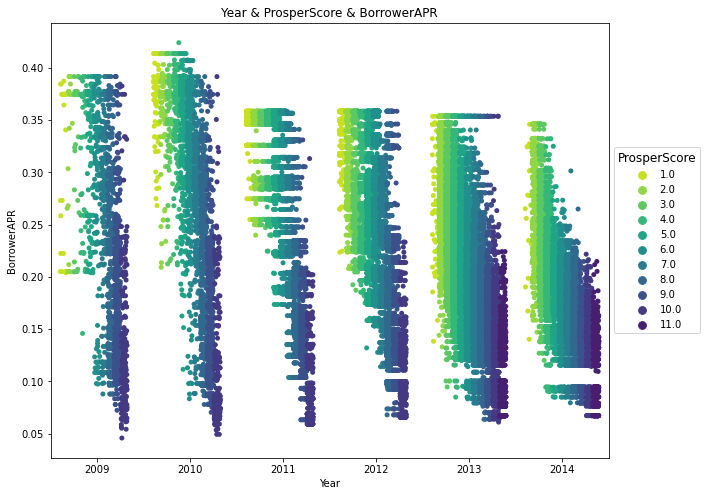

In [12]:
# Plot the relation between Year, APR and ProsperScore 
plt.figure(figsize=(10, 8))
sns.stripplot(data = loan.query('year >= 2009'), x = 'year', y ='BorrowerAPR', hue ='ProsperScore', palette ='viridis_r',
             jitter =0.35, dodge=True)
plt.title('Year & ProsperScore & BorrowerAPR')
plt.xlabel('Year')
plt.ylabel('BorrowerAPR')
plt.legend(loc='center left', bbox_to_anchor =(1, 0.5), title ='ProsperScore', title_fontsize=12);

## BorrowerAPR by CreditScoreMean:
-  the CreditScoreMean looks consistant and enormous in lower APR, although in year 2013 CreditScoreMean is very high in all APR values 

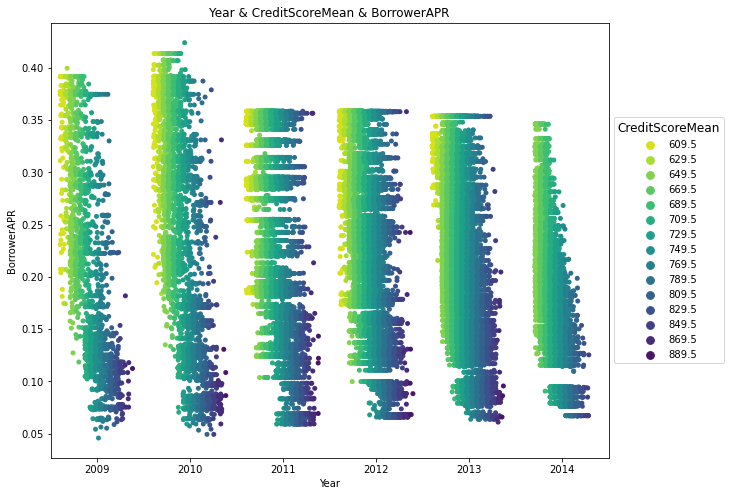

In [11]:
#  Creat a new column (CreditScoreMean) which will be the mean of CreditScoreRangeLower and CreditScoreRangeUpper 
# which will reduse the amount of variables for analysis 
loan['CreditScoreMean'] = loan[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis = 1)

# Plot the relation between Year, CreditScoreMean and APR 
plt.figure(figsize=(10, 8))
sns.stripplot(data = loan.query('year >= 2009'), x = 'year', y ='BorrowerAPR', hue ='CreditScoreMean', palette ='viridis_r',
             jitter =0.35, dodge=True)
plt.title('Year & CreditScoreMean & BorrowerAPR')
plt.xlabel('Year')
plt.ylabel('BorrowerAPR')
plt.legend(loc='center left', bbox_to_anchor =(1, 0.5), title ='CreditScoreMean', title_fontsize=12);

# Conclusion:
- Prosper Score has the strongest negative correlation of all variables, your Prosper score increases as the expectancy that your APR will drop increases.
### On Credit Score Mean:
- From 2006-2008 we see some yellow colored plots which indicate lower credit scores. However after 2009 those yellow dots completely disappear
- From 2011 and after max APR has dropped from above 40% to slightly above 36%
### On Prosper Score: 
- Best rates (below 10%) are reserved for the best Prosper Scores (10+)
- From 2011 and after max APR has dropped from above 40% to slightly above 36%

In [13]:
!jupyter nbconvert Loan_Data_prosper_Slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Loan_Data_prosper_Slides.ipynb to slides
[NbConvertApp] Writing 464652 bytes to Loan_Data_prosper_Slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\7emdan\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\7emdan\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\7emdan\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\7emdan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\7emdan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_f